# COGS 108 - Final Project 

# Overview

This project explores the relationship between undergraduate college majors and their post-graduation success rate. The goal of our project is to be able to operationalize and define success and understand how the correlation across variables that determine success. 

# Names

- Amanda Chung
- Christine Fann
- Darren Liu
- Kai-ling Peng
- Priscila Romero

# Research Question

What is the relationship between a college major and post-graduate success?
- What are the most successful majors?
    - Is there a relationship between employment rate and median income (two indicators of "success")?
    - Does major popularity have a relationship with "success?" I.e. the correlation between "total" majors and employment rate/median income
- How does graduating with a certain major impact one's future career in pursuing further education or job opportunities?
- What is the male to female ratio for popular majors?
    - Is there a correlation between median income and percentage of women in the field?

## Background and Prior Work

One of the largest issues young college students face in their lives today is the uncertainty of their future employment prospects. From 2000 to 2017, the number of students enrolled in college has increased 27% (from 13.2 million to 16.8 million students) (NCES 2019). As the number of students continues to increase, so will competition for employment. 

Using the resources mentioned below, we researched current discussion going on regarding college majors and their success rate. We used these resources fundamentally as a starting ground to approaching our data analysis. There are different perspectives in how undergrad majors are valued. It is currently claimed that the most popular majors in engineering are lead to the highest paying majors. Additionally, the number of women in these popular majors are still lacking in comparison to men. Through our project, we hope to bring greater insight to the range of college majors and their popularity, and understand what factors like percentage of women and salary play in understanding future career opportunities and demographics. 

Our project was inspired by the group’s uncertainty about their future prospects and their own experiences with their majors. A student’s choice in major generally determines their career path. With such a heavy choice, knowing which major contributes to the most postgraduate success is vital. 

Here are some of our references we used to support our research and data:
Bardaro, Katie. “Majors by Gender: Is It Bias or the Major That Determines Future Pay?” 
PayScale, Pay Scale Inc, 13 Sept. 2017,	
www.payscale.com/career-news/2009/12/do-men-or-women-choose-majors-to-maxiz-income

Carnevale, Anthony P, et al. “The Economic Value of College Majors.” CEW Georgetown, 
Georgetown University, 12 June 2018,
cew.georgetown.edu/cew-reports/valueofcollegemajors/

Tharp, Derek. “Is a College Degree Worth It? The Answer Isn't as Simple as You Think.” The 
Wall Street Journal, Dow Jones & Company, 15 Feb. 2018, 
blogs.wsj.com/experts/2018/02/15/is-a-college-degree-worth-it-the-answer-isnt-as-simpl
e-as-you-think/


# Hypothesis


We have a few hypotheses regarding our data set. Firstly, we hypothesize that there is no relationship between popular majors among college students and post-graduate success. Secondly, we hypothesize that there is an inverse relationship between major median salary and unemployment rate. Lastly, we also hypothesize that there will be a negative relationship between post graduate success and percentage of women in the field. 

# Dataset(s)

All our datasets are from https://github.com/fivethirtyeight/data/tree/master/college-majors

The datasets were taken from the American Community Survey 2010-2012 Public Use Microdata Series and has already been cleaned. It is a compilation of majors, median salaries, employment rates, and gender ratios within each major. Using this data, we can see if there is a relationship between post graduate success and choice in major. We use the datasets containing unemployment rate and median salary to determine post graduate success. The higher the salary and lower the unemployment rate, the more successful a major is considered to be. 

- Dataset Name: all-ages.csv
- Link to the dataset: https://github.com/fivethirtyeight/data/blob/master/college-majors/all-ages.csv
- Number of observations: 174

This dataset contains general workforce data for people of all ages in the United States

- Dataset Name: recent-grads.csv
- Link to the dataset: https://github.com/fivethirtyeight/data/blob/master/college-majors/recent-grads.csv
- Number of observations: 174

This dataset contains workforce data of recent graduates in the United States, with a more detailed breakdown.

We plan to combine the datasets above; all-ages has more data but less fields, so we'd like to use some fields from recent-grads to further our analysis. The feature engineering will be described in the data cleaning section.

*Disclaimer: due to the nature of our project, none of our datasets have over 1000 observations, but this was cleared with the professor*

# Setup

In [1]:
%matplotlib inline
import numpy as np
import pandas as pd
import seaborn as sns
from scipy.stats import linregress

In [2]:
# read datasets
all_ages = pd.read_csv('data/all-ages.csv')
grad_students = pd.read_csv('data/grad-students.csv')
recent_grads = pd.read_csv('data/recent-grads.csv')
women_stem = pd.read_csv('data/women-stem.csv')

# Data Cleaning
Clean `all_ages` by extracting wanted columns, converting some quantitative columns to proportions, and adding part/full time data from `recent_grads`

### Extract wanted columns

We will be using the datasets `all_ages` and `recent_grads`.

In [3]:
print("all_ages: ")
display(all_ages.head(3))

all_ages: 


,Major_code,Major,Major_category,Total,Employed,Employed_full_time_year_round,Unemployed,Unemployment_rate,Median,P25th,P75th
0,1100,GENERAL AGRICULTURE,Agriculture & Natural Resources,128148,90245,74078,2423,0.026147,50000,34000,80000.0
1,1101,AGRICULTURE PRODUCTION AND MANAGEMENT,Agriculture & Natural Resources,95326,76865,64240,2266,0.028636,54000,36000,80000.0
2,1102,AGRICULTURAL ECONOMICS,Agriculture & Natural Resources,33955,26321,22810,821,0.030248,63000,40000,98000.0


In [4]:
print("recent_grads: ")
display(recent_grads.head(3))

recent_grads: 


,Rank,Major_code,Major,Total,Men,Women,Major_category,ShareWomen,Sample_size,Employed,...,Part_time,Full_time_year_round,Unemployed,Unemployment_rate,Median,P25th,P75th,College_jobs,Non_college_jobs,Low_wage_jobs
0,1,2419,PETROLEUM ENGINEERING,2339.0,2057.0,282.0,Engineering,0.120564,36,1976,...,270,1207,37,0.018381,110000,95000,125000,1534,364,193
1,2,2416,MINING AND MINERAL ENGINEERING,756.0,679.0,77.0,Engineering,0.101852,7,640,...,170,388,85,0.117241,75000,55000,90000,350,257,50
2,3,2415,METALLURGICAL ENGINEERING,856.0,725.0,131.0,Engineering,0.153037,3,648,...,133,340,16,0.024096,73000,50000,105000,456,176,0


We will be basing our data analysis mainly off of the `all_ages` dataframe. The `all_ages` dataset has been mostly cleaned. We now further extract the columns that we need: `Major`, `Major_category`, `Employed`, `Median`, `P25th`, `P75th`, and `Total`.

In [5]:
# Extract wanted columns from all_ages
wanted_cols_all = 'Major Major_category Employed Median P25th P75th Total'.split()
all_wanted = all_ages.copy()[wanted_cols_all]
print("all_ages after cleaning: ")
all_wanted.head()

all_ages after cleaning: 


,Major,Major_category,Employed,Median,P25th,P75th,Total
0,GENERAL AGRICULTURE,Agriculture & Natural Resources,90245,50000,34000,80000.0,128148
1,AGRICULTURE PRODUCTION AND MANAGEMENT,Agriculture & Natural Resources,76865,54000,36000,80000.0,95326
2,AGRICULTURAL ECONOMICS,Agriculture & Natural Resources,26321,63000,40000,98000.0,33955
3,ANIMAL SCIENCES,Agriculture & Natural Resources,81177,46000,30000,72000.0,103549
4,FOOD SCIENCE,Agriculture & Natural Resources,17281,62000,38500,90000.0,24280


### Feature Engineering
Now that all the information in `all_wanted` is useful, we can now further manipulate the data to change it into a form that is more useful during our analysis stage. We will also append data from `recent_grads`, which contains more data about post-grad employment. We will be using the columns `Full_time`, `Part_time`, `ShareWomen`, and `Total` to form the new columns `Employment_rate`, `Full_time_rate`, `Part_time_rate`, and `PercentWomen`. 

We will change the following columns:
- Employed -> Employment_rate
- Full_time -> Full_time_rate (in `recent_grads`)
- Part_time -> Part_time_rate (in `recent_grads`)

and create the following columns:
- PercentWomen (added from `recent_grads`)
- Women_popularity (added from `recent_grads`)
- Men_popularity (added from `recent_grads`)
- Unemployment_rate

In [6]:
# Employment rate
all_wanted['Employment_rate'] = all_wanted['Employed'] / all_wanted['Total']

# Full time rate (add from recent_grads)
all_wanted['Full_time_rate'] = recent_grads['Full_time'] / recent_grads['Total']

# Part time rate (add from recent_grads)
all_wanted['Part_time_rate'] = recent_grads['Part_time'] / recent_grads['Total']

#Percent Women (add from recent_grads)
all_wanted['PercentWomen'] = recent_grads['ShareWomen']

#Women_popularity (add from recent_grads)
all_wanted['Women_popularity'] = recent_grads['Women'] / recent_grads['Women'].sum()

#Men_popularity (add from recent_grads)
all_wanted['Men_popularity'] = recent_grads['Men'] / recent_grads['Men'].sum()

# Unemployment_rate
all_wanted['Unemployment_rate'] = 1 - all_wanted['Employment_rate']

all_wanted = all_wanted.drop('Employed', axis=1).dropna().reset_index(drop=True)
all_wanted.head()

,Major,Major_category,Median,P25th,P75th,Total,Employment_rate,Full_time_rate,Part_time_rate,PercentWomen,Women_popularity,Men_popularity,Unemployment_rate
0,GENERAL AGRICULTURE,Agriculture & Natural Resources,50000,34000,80000.0,128148,0.704225,0.790509,0.115434,0.120564,0.000072,0.000715,0.295775
1,AGRICULTURE PRODUCTION AND MANAGEMENT,Agriculture & Natural Resources,54000,36000,80000.0,95326,0.806338,0.735450,0.224868,0.101852,0.000020,0.000236,0.193662
2,AGRICULTURAL ECONOMICS,Agriculture & Natural Resources,63000,40000,98000.0,33955,0.775173,0.651869,0.155374,0.153037,0.000034,0.000252,0.224827
3,ANIMAL SCIENCES,Agriculture & Natural Resources,46000,30000,72000.0,103549,0.783948,0.849762,0.119237,0.107313,0.000035,0.000390,0.216052
4,FOOD SCIENCE,Agriculture & Natural Resources,62000,38500,90000.0,24280,0.711738,0.718227,0.160570,0.341631,0.002829,0.007384,0.288262


# Data Analysis & Results

## 1. Barplot visualization: Seeing which major categories have the highest employment rates, median salaries, and total majors
The following plots were created by grouping by major category and taking the mean values.

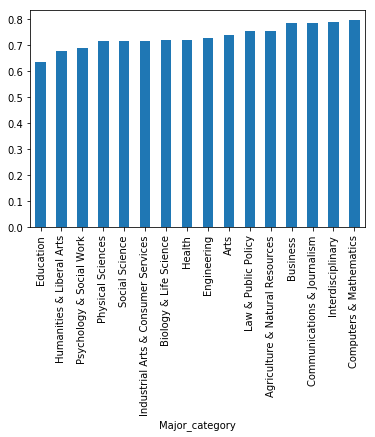

In [7]:
# Employment Rate Plot
all_wanted.groupby('Major_category')['Employment_rate'].mean().sort_values().plot(kind='bar', color='C0')

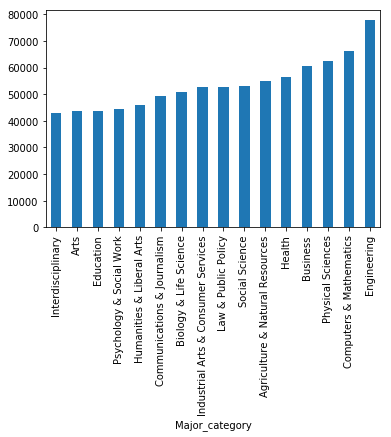

In [8]:
# Median Salary Plot
all_wanted.groupby('Major_category')['Median'].mean().sort_values().plot(kind='bar', color='C0')

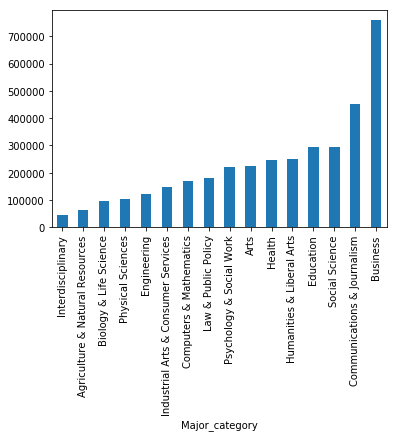

In [9]:
# Major Popularity Plot
all_wanted.groupby('Major_category')['Total'].mean().sort_values().plot(kind='bar', color='C0')

### 1.1 Discussion
Although Engineering/Computer & Mathematics majors seem to have high median salaries and Computer & Mathematics majors have high employment rates, it seems that these do not impact major popularity, as both major categories are in the lower echelon of the major popularity plot.

## 2 Further exploration: Relationship between employment rate and median income
### 2.1 Visualize a regression line between these two indicators of "successful" majors

R-Value = 0.11802219581243543


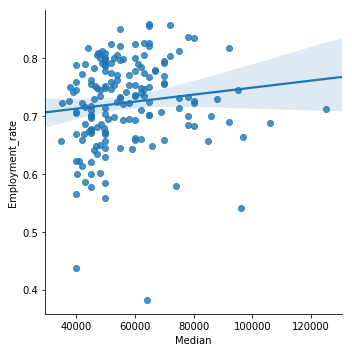

In [10]:
sns.lmplot(data=all_wanted, x='Median', y='Employment_rate')
rval = linregress(all_wanted['Median'], all_wanted['Employment_rate']).rvalue
print('R-Value = ' + str(rval))

After selecting all the unique majors, we plotted each major’s median salary (Median) and their unemployment rate (Employment_rate). By using a linear regression, we can better visualize the relationship between the two variables. This graph indicates that there may be a positive correlation between median salary and employment rate for majors, but it is not indicative of cause.

Regression plot isn't too helpful; the scatterplot is too scattered. Second attempt: bin the data 

In [11]:
emp_med = all_wanted.copy()[['Employment_rate', 'Median']]

Text(0.5, 1.0, 'Employment Rate Histogram')

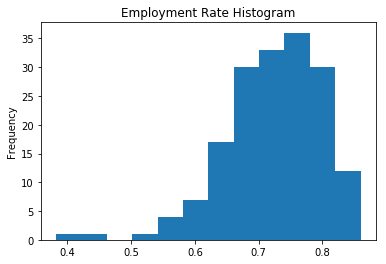

In [12]:
emp_med.Employment_rate.plot.hist(bins=12).set_title('Employment Rate Histogram')

Visualization of how the histogram of employment rate looks with 12 bins

In [13]:
# categorizing employment rate and median as new columns
def categorize(val):
    '''
    Categorizes the bins as 1, 2, 3, 4, 5, 6 from low to high:
    '''
    if 1 <= val <= 2:
        return 1
    if 3 <= val <= 4:
        return 2
    if 5 <= val <= 6:
        return 3
    if 7 <= val <= 8:
        return 4
    if 9 <= val <= 10:
        return 5
    return 6

emp_med['emp_binned'] = pd.qcut(emp_med['Employment_rate'], 12, labels = np.arange(1, 13)).apply(categorize)
emp_med.head()

,Employment_rate,Median,emp_binned
0,0.704225,50000,3
1,0.806338,54000,6
2,0.775173,63000,5
3,0.783948,46000,5
4,0.711738,62000,3


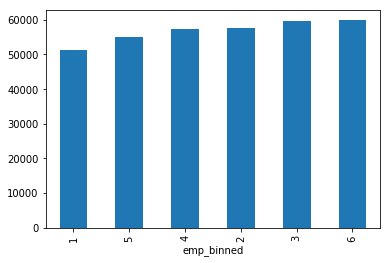

In [14]:
inc_vs_emp = emp_med.groupby('emp_binned')['Median'].mean()
inc_vs_emp.sort_values().plot.bar(color='C0')

By condensing the median salaries and unemployment rates based on fields, we get a better visualization of the relationship between median salary and unemployment rate.  

### Discussion
Even once binned, the data seems to not have a trend between employment rate and median income. The only interesting note is that the lowest employment rate bin has the lowest median income, and the highest employment rate bin has the highest median income. Perhaps with a larger sample size, there will be more interesting findings.

## 2.2 Relationship between major popularity and employment rate/median income
### 2.2.1 Visualize regression between employment rate and total majors
Discussion of all these visualizations are after all the linear regression plots

R-Value = -0.014372589565799202
Linear regression of total majors and employment rate


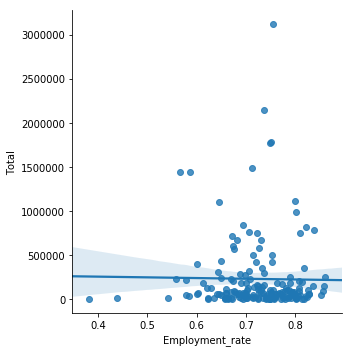

In [15]:
sns.lmplot(data=all_wanted, x='Employment_rate', y='Total')
rval = linregress(all_wanted['Employment_rate'], all_wanted['Total']).rvalue
print('R-Value = ' + str(rval))
print('Linear regression of total majors and employment rate')

Most of the data seems to be congregated at total majors of sub 500000. Let's split the data into these two groups and plot regressions to see if there are any better findings

R-Value = -0.014372589565799202
Linear regression of total majors (below 500k) and employment rate


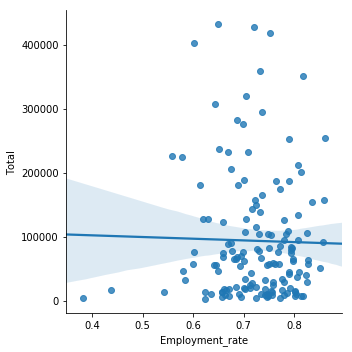

In [16]:
# Sub 500k
sub_500k = all_wanted[all_wanted.Total < 500000]

sns.lmplot(data=sub_500k, x='Employment_rate', y='Total')
rval = linregress(all_wanted['Employment_rate'], all_wanted['Total']).rvalue
print('R-Value = ' + str(rval))
print('Linear regression of total majors (below 500k) and employment rate')

R-Value = -0.014372589565799202
Linear regression of total majors (above 500k) and employment rate


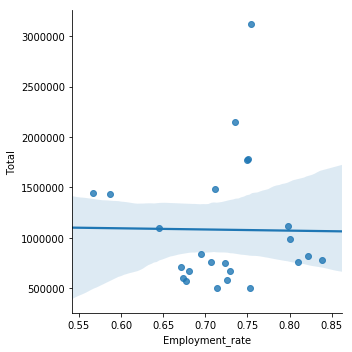

In [17]:
# Above 500k
abv_500k = all_wanted[all_wanted.Total > 500000]

sns.lmplot(data=abv_500k, x='Employment_rate', y='Total')
rval = linregress(all_wanted['Employment_rate'], all_wanted['Total']).rvalue
print('R-Value = ' + str(rval))
print('Linear regression of total majors (above 500k) and employment rate')

### 2.2.1 Visualize regression between employment rate and total majors

R-Value = -0.03251107202278737
Linear regression of total majors and median income


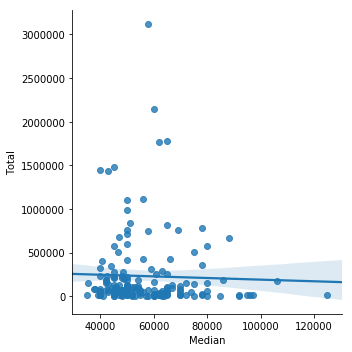

In [18]:
sns.lmplot(data=all_wanted, x='Median', y='Total')
rval = linregress(all_wanted['Median'], all_wanted['Total']).rvalue
print('R-Value = ' + str(rval))
print('Linear regression of total majors and median income')

R-Value = -0.03251107202278737
Linear regression of total majors (below 500k) and median income


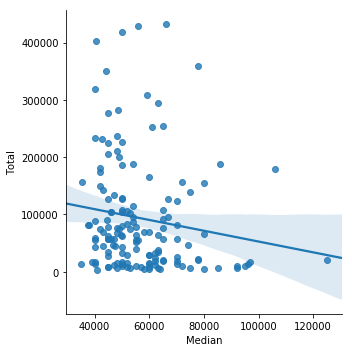

In [19]:
# Sub 500k
sub_500k = all_wanted[all_wanted.Total < 500000]

sns.lmplot(data=sub_500k, x='Median', y='Total')
rval = linregress(all_wanted['Median'], all_wanted['Total']).rvalue
print('R-Value = ' + str(rval))
print('Linear regression of total majors (below 500k) and median income')

R-Value = -0.03251107202278737
Linear regression of total majors (above 500k) and median income


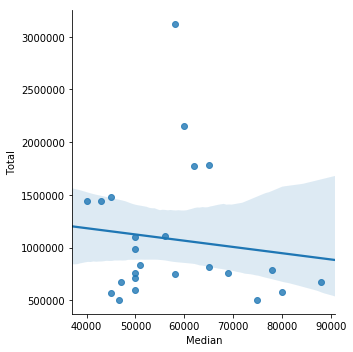

In [20]:
# Above 500k
sub_500k = all_wanted[all_wanted.Total > 500000]

sns.lmplot(data=sub_500k, x='Median', y='Total')
rval = linregress(all_wanted['Median'], all_wanted['Total']).rvalue
print('R-Value = ' + str(rval))
print('Linear regression of total majors (above 500k) and median income')

### 2.3 Discussion
There seem to be no relationships between major popularity and the two chosen indicators of success, even once separating total into two groups, supporting our initial barplot visualization.

## 3. What if we want to see what the best major is given certain requirements?
#### Naive optimization: 
Exploring best combo based on z-scores. Standardize each quantitative column to normalize them, sum together wanted columns.

In [21]:
def optimize(df, cols):
    '''
    Optimize major to choose based on values selected. Returns the dataframe
    rankings and the top 5 majors.
    '''
    def standardize(col):
        '''
        Convert each value in the column to it's z-score
        '''
        return (col - col.mean()) / col.std()
    
    # Get wanted input columns
    wanted = df[cols]
    
    # Apply standardization, create new df with major and category
    wanted_z = wanted.apply(standardize)
    wanted_z = pd.concat([wanted_z, df.Major], axis=1)
    wanted_z = pd.concat([wanted_z, df.Major_category], axis=1)
    
    # Sum the standardized values
    wanted_z['Sums'] = wanted_z[cols].sum(axis=1)
    
    # Create output: df_rankings and top_5
    df_rankings = wanted_z.sort_values(by='Sums', ascending=False).reset_index(drop=True)
    top_5 = wanted_z.sort_values(by='Sums', ascending=False).Major[:5].reset_index(drop=True)
    
    return df_rankings, top_5

In [22]:
# Example: best major when considering median income, employment rate, and full time rate
cols = ['Median', 'Employment_rate', 'Full_time_rate']
df_rankings, top_5 = optimize(all_wanted, cols)

print('__________________________________________________________________')
print('\nMajor rankings by columns ' + ', '.join(cols) + ': ')
display(df_rankings.head(10))
print('__________________________________________________________________')
print('\nTop 5 majors by columns ' + ', '.join(cols) + ': ')
display(top_5)

__________________________________________________________________

Major rankings by columns Median, Employment_rate, Full_time_rate: 


,Median,Employment_rate,Full_time_rate,Major,Major_category,Sums
0,4.635146,-0.133490,0.115962,PETROLEUM ENGINEERING,Engineering,4.617619
1,3.344754,-0.455586,1.430277,PHARMACY PHARMACEUTICAL SCIENCES AND ADMINISTR...,Health,4.319445
2,1.239377,0.113157,2.865514,INDUSTRIAL AND MANUFACTURING ENGINEERING,Engineering,4.218048
3,0.424392,1.371226,2.009925,MISCELLANEOUS ENGINEERING TECHNOLOGIES,Engineering,3.805543
4,0.560223,1.805726,1.367413,COMPUTER AND INFORMATION SYSTEMS,Computers & Mathematics,3.733362
5,1.443123,1.514739,0.455729,COMPUTER SCIENCE,Computers & Mathematics,3.413591
6,1.578954,1.477116,0.344146,COMPUTER ENGINEERING,Engineering,3.400216
7,2.393939,1.246230,-0.553029,MATHEMATICS AND COMPUTER SCIENCE,Computers & Mathematics,3.087140
8,0.220646,1.333417,1.261510,MECHANICAL ENGINEERING RELATED TECHNOLOGIES,Engineering,2.815573
9,1.035631,1.061142,0.613151,ACTUARIAL SCIENCE,Business,2.709924


__________________________________________________________________

Top 5 majors by columns Median, Employment_rate, Full_time_rate: 


0                                PETROLEUM ENGINEERING
1    PHARMACY PHARMACEUTICAL SCIENCES AND ADMINISTR...
2             INDUSTRIAL AND MANUFACTURING ENGINEERING
3               MISCELLANEOUS ENGINEERING TECHNOLOGIES
4                     COMPUTER AND INFORMATION SYSTEMS
Name: Major, dtype: object

#### What if we wanted to add weights to columns we care more about? 
Let's introduce a simple ranking system for the columns.

In [23]:
def optimize_weights(df, cols, rankings):
    '''
    Optimize major to choose based on values selected. Returns the dataframe
    rankings and the top 5 majors.
    :param df: input df with major data
    :param cols: columns we care about
    :param rankings: list of rankings for the input columns
    '''
    assert (len(cols) == len(rankings)), 'Number of columns and rankings should be the same' 
    assert (max(rankings) == len(cols)), 'Max rank should be the length of the columns'
    assert (min(rankings) == 1),         'Min rank must be 1' 
    
    def standardize(col):
        '''
        Convert each value in the column to it's z-score
        '''
        return (col - col.mean()) / col.std()
    
    def weight(ser):
        '''
        Assign a general weight system to the rankings
        Example: 4 columns ['A', 'B', 'C'] with rankings [1, 2, 3]
        Weights assigned would be {'A': 1.3, 'B': 1.15, 'C': 1}
        '''
        weights = [(1 + (x * 0.15)) for x in range(len(ser))]
        weights_dct = dict(zip(ser.index, weights))
        return weights_dct
    
    # convert rankings/columns into a series
    rankings_ser = pd.Series(rankings, index=cols).sort_values(ascending=False)
    weights = weight(rankings_ser)
    
    # Get wanted input columns
    wanted = df[cols]
    
    # Apply standardization, multiply weights, create new df with major and category
    wanted_z = wanted.apply(standardize)
    for col in cols:
        wanted_z[col] = wanted_z[col] * weights[col]
    wanted_z = pd.concat([wanted_z, df.Major], axis=1)
    wanted_z = pd.concat([wanted_z, df.Major_category], axis=1)
    
    # Sum the standardized values
    wanted_z['Sums'] = wanted_z[cols].sum(axis=1)
    
    # Create output: df_rankings and top_5
    df_rankings = wanted_z.sort_values(by='Sums', ascending=False).reset_index(drop=True)
    top_5 = wanted_z.sort_values(by='Sums', ascending=False).Major[:5].reset_index(drop=True)
    
    return df_rankings, top_5, weights

In [24]:
# Example: best major when considering median income, employment rate, and full time rate
cols = ['Median', 'Employment_rate', 'Full_time_rate']
rankings = [3, 2, 1]
df_rankings, top_5, weights = optimize_weights(all_wanted, cols, rankings)

print('________________________________________________________________________')
print('\nWeights: ' + str(weights))
print('________________________________________________________________________')
print('\nMajor rankings by columns ' + ', '.join(cols) + ': ')
display(df_rankings.head(10))
print('________________________________________________________________________')
print('\nTop 5 majors by columns ' + ', '.join(cols) + ': ')
display(top_5)

________________________________________________________________________

Weights: {'Median': 1.0, 'Employment_rate': 1.15, 'Full_time_rate': 1.3}
________________________________________________________________________

Major rankings by columns Median, Employment_rate, Full_time_rate: 


,Median,Employment_rate,Full_time_rate,Major,Major_category,Sums
0,1.239377,0.130130,3.725168,INDUSTRIAL AND MANUFACTURING ENGINEERING,Engineering,5.094676
1,3.344754,-0.523924,1.859360,PHARMACY PHARMACEUTICAL SCIENCES AND ADMINISTR...,Health,4.680190
2,4.635146,-0.153514,0.150751,PETROLEUM ENGINEERING,Engineering,4.632384
3,0.424392,1.576910,2.612902,MISCELLANEOUS ENGINEERING TECHNOLOGIES,Engineering,4.614204
4,0.560223,2.076585,1.777637,COMPUTER AND INFORMATION SYSTEMS,Computers & Mathematics,4.414445
5,1.443123,1.741950,0.592447,COMPUTER SCIENCE,Computers & Mathematics,3.777520
6,1.578954,1.698684,0.447390,COMPUTER ENGINEERING,Engineering,3.725028
7,0.220646,1.533430,1.639963,MECHANICAL ENGINEERING RELATED TECHNOLOGIES,Engineering,3.394039
8,0.084815,0.725887,2.314812,EDUCATIONAL ADMINISTRATION AND SUPERVISION,Education,3.125515
9,2.393939,1.433165,-0.718937,MATHEMATICS AND COMPUTER SCIENCE,Computers & Mathematics,3.108166


________________________________________________________________________

Top 5 majors by columns Median, Employment_rate, Full_time_rate: 


0             INDUSTRIAL AND MANUFACTURING ENGINEERING
1    PHARMACY PHARMACEUTICAL SCIENCES AND ADMINISTR...
2                                PETROLEUM ENGINEERING
3               MISCELLANEOUS ENGINEERING TECHNOLOGIES
4                     COMPUTER AND INFORMATION SYSTEMS
Name: Major, dtype: object

### 3.1 Discussion:
Using the optimization model with no weights, we found that measuring major success using the three factors of `Median`, `Employment_rate`, and `Full_time_rate` shows that the top 5 majors that are the most successful after graduation are:
1. Petroleum Engineering
2. Pharmacy Pharmaceutical Sciences and Administration
3. Industrial and Manufacturing Engineering
4. Miscellaneous Engineering Technologies
5. Computer and Information Systems. 

This optimization model is very naive because it merely sums up the z-scores of the three factors. Thus, the most successful majors are determined based on how well they perform in each factor with respect to other majors. 

Using the optimization model with weights, we can now determine what a "successful major" means with more variability. The model allows us to input different weights for each factor, so in the example, we input the factors `Median` with a weight of 3, `Employment_rate` with a weight of 2, and `Full_time_rate` with a weight of 1. We found that using these factors and weights, the top 5 majors that are the most successful after graduation are: 
1. Industrial and Manufacturing Engineering
2. Pharmacy Pharmaceutical Sciences and Administration
3. Petroleum Engineering
4. Miscellaneous Engineering Technologies
5. Computer and Information Systems

## 4. What is the male to female ratio for popular majors?

We then took a look at the male to female ratio for popular college majors. This section of our project brings us back to our discussion of ethics. Our project is relevant to the push to encourage women in STEM and bridge gender gaps in majors and careers. The data table below looks at the total number of students pursuing a specific major and the percentage of women. By comparing the ratio of male to female we hope to gain deeper insight to how these numbers have changed with development in technology and more women being present in the workforce. Additionally, by looking at specific variables within our dataset to women we could make better sense of what our data was saying without bias.

### 4.1 Proportion and Distribution of Women vs Men

Is there a significant trend in the proportion of women in each major category?

Proportion of women in each major category:


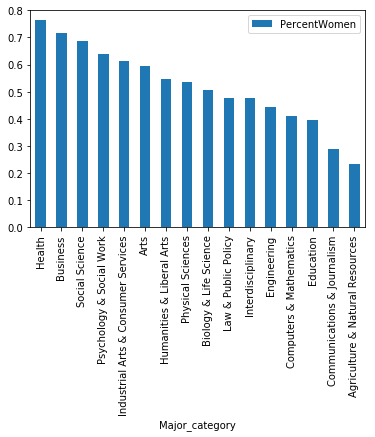

In [25]:
#proportion of women in each major category
proportion_women = all_wanted.groupby('Major_category').mean().reset_index()
proportion_women = proportion_women.sort_values('PercentWomen', ascending = False)
print("Proportion of women in each major category:")
proportion_women.plot(kind='bar', x='Major_category', y='PercentWomen', color='C0')

Above you can see in the form of a histogram the percentage of women within each major. This is a visual representation of which majors are popular to women to understand how their statistics may possibly be different from men in our next step in the project. 

It seems like the major categories of `Health`, `Business`, `Social Ccience`, and `Psychology & Social Work` has a lot more women than men. The amount of women in those major categories is well over 65% of the total count. 

The majors `Agriculture & Natural Resources` and `Communications & Journalism` has a lot less women than men. The amount of women in those major categories is well below 30% of the total count. 

Is there a trend between how popular the major is amongst women and how popular the major is overall?

R-Value = -0.0016834823682993813


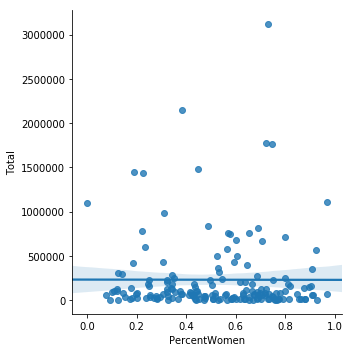

In [26]:
sns.lmplot(data=all_wanted, x='PercentWomen', y='Total')
rval = linregress(all_wanted['PercentWomen'], all_wanted['Total']).rvalue
print('R-Value = ' + str(rval))

There is no correlation between a major’s popularity and its percentage of women. This means that the percentage of women does not significantly impact how popular that major is to undergraduate students.

Now let's look at the distribution of women with respect to all major categories. Is there a significant correlation between male and female popularity?

Distribution of men vs women across major categories:


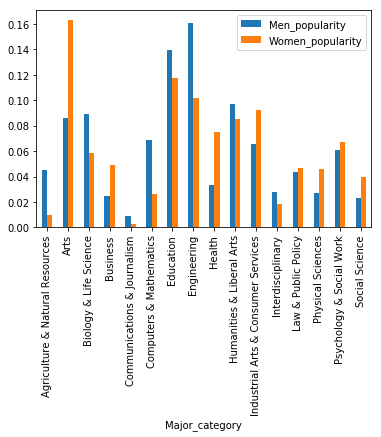

In [27]:
#distribution of women vs distribution of men
distribution = all_wanted.groupby('Major_category').sum().reset_index('Major_category')
df=pd.DataFrame(distribution[['Major_category','Men_popularity', 'Women_popularity']])
print("Distribution of men vs women across major categories:")
df.plot(kind='bar', x="Major_category")

To explore the distribution of men vs women across major categories we compared the percentage of men and women in majors. From this data we were able to determine which fields appealed more to each gender and categorize types of majors. STEM majors like Engineering are more popular with males and fields in Arts & Humanities are more popular with women. The difference in popular major choices between gender indicate spots of potential gaps and areas to analyse when defining post-graduate success. 

### 4.2 Correlation between proportion of women vs other factors
Let's see if theres a correlation between percentage women and other factors for each major:

R-Value = 0.011109429209186594


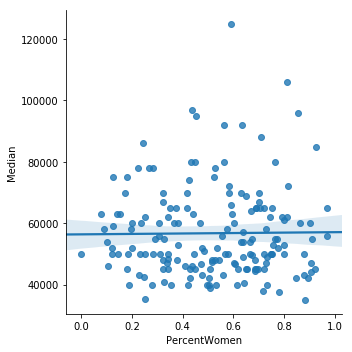

In [28]:
# linregress plot for median income and percent women in each major
sns.lmplot(data=all_wanted, x='PercentWomen', y='Median')
rval = linregress(all_wanted['PercentWomen'], all_wanted['Median']).rvalue
print('R-Value = ' + str(rval))

#### Observations: 
First we looked at the median income relationship to percentage of women in each major. We used a linear regression plot to help visualize the relationship of the two factors. The results show that there is little to no correlation (r-value = 0.01). This proposes that majors with a higher percentage of women does not propose that the median income salary earned after graduation is not necessarily higher for that major. 

R-Value = 0.11128981367778752


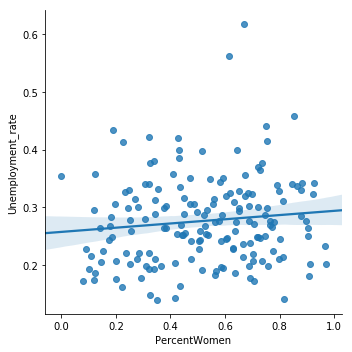

In [29]:
# linregress plot for unemployment rate and percent women in each major
sns.lmplot(data=all_wanted, x='PercentWomen', y='Unemployment_rate')
rval = linregress(all_wanted['PercentWomen'], all_wanted['Unemployment_rate']).rvalue
print('R-Value = ' + str(rval))

#### Observations: 
Next we used the same model as above to look at the relationship between unemployment rate and the percentage of women in each major. Our observations show that there is not enough correlation for the two factors (r-value = 0.11). From this we can gain insight that unemployment rate for women is influenced by greater factors than just the major graduated with. There is more research necessary to compare the two factors and understand the relationship and the role that “women” play in the data.

R-Value = -0.43444282080360086


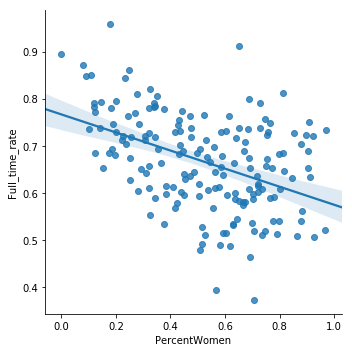

In [30]:
# linregress plot for full time rate and percent women in each major
sns.lmplot(data=all_wanted, x='PercentWomen', y='Full_time_rate')
rval = linregress(all_wanted['PercentWomen'], all_wanted['Full_time_rate']).rvalue
print('R-Value = ' + str(rval))

#### Observations:
Finally, we looked at the relationship between women who work full-time and the percentage of women in each major. There is a moderate negative correlation between the two factors. This correlation suggests the lower the number of women in a major, the greater the full-time employment rate is. This aligns with the fact that the Engineering majors have greater median income salary rates and that there are less women in that major field as they are not dominant in the field (for now).  

### 4.3 Using the optimization model

Using the optimization model, we can compare each major success with the proportion of women within each major category
<br><br>
For this portion, we consider the factors of median salary, employment rate, and full-time rate in our calculations.

,Median,Employment_rate,Full_time_rate,Major,Major_category,Sums
0,4.635146,-0.133490,0.115962,PETROLEUM ENGINEERING,Engineering,4.617619
1,3.344754,-0.455586,1.430277,PHARMACY PHARMACEUTICAL SCIENCES AND ADMINISTR...,Health,4.319445
2,1.239377,0.113157,2.865514,INDUSTRIAL AND MANUFACTURING ENGINEERING,Engineering,4.218048
3,0.424392,1.371226,2.009925,MISCELLANEOUS ENGINEERING TECHNOLOGIES,Engineering,3.805543
4,0.560223,1.805726,1.367413,COMPUTER AND INFORMATION SYSTEMS,Computers & Mathematics,3.733362


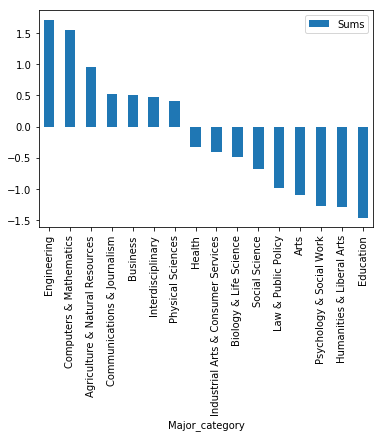

In [31]:
# using the optimize method above, optimize majors
cols = ['Median', 'Employment_rate', 'Full_time_rate']
rankings, top_5 = optimize(all_wanted, cols)

#plot based on each major category
rankings.groupby('Major_category').mean().reset_index().sort_values('Sums', ascending = False).plot(kind='bar', x='Major_category', y='Sums', color='C0')

#dataframe shows top majors
rankings.head()

,Major,Major_category,Median,P25th,P75th,Total,Employment_rate,Full_time_rate,Part_time_rate,PercentWomen,Women_popularity,Men_popularity,Unemployment_rate
163,MARKETING AND MARKETING RESEARCH,Business,56000,38500,90000.0,1114624,0.798588,0.733433,0.186251,0.968954,0.009350,0.000406,0.201412
162,BUSINESS ECONOMICS,Business,65000,45000,100000.0,75547,0.767509,0.521827,0.362131,0.967998,0.009513,0.000426,0.232491
50,GEOLOGICAL AND GEOPHYSICAL ENGINEERING,Engineering,85000,55000,125000.0,6264,0.657727,0.507327,0.369235,0.927807,0.002649,0.000279,0.342273
137,FINE ARTS,Arts,45000,30000,70000.0,571961,0.676551,0.720915,0.222197,0.923745,0.040520,0.004530,0.323449
149,MEDICAL ASSISTING SERVICES,Health,55000,37000,75000.0,64316,0.797298,0.633558,0.273650,0.910933,0.013564,0.001796,0.202702


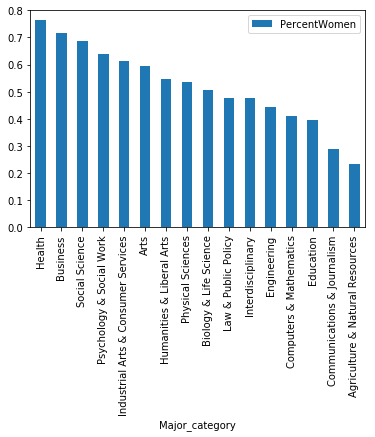

In [32]:
# proportion of women in each major
top_women = all_wanted.sort_values('PercentWomen', ascending=False)

#plot based on major category
top_women.groupby('Major_category').mean().reset_index().sort_values('PercentWomen', ascending = False).plot(kind='bar', x='Major_category', y='PercentWomen', color='C0')

#df shows majors with most women to least women
top_women.head()

In [33]:
# is there a correlation between the 2?
combined = pd.merge(rankings, top_women, on='Major')
corr = rankings['Sums'].corr(top_women['PercentWomen'])
corr

-0.6466473849773962

R-Value = -0.30526030174926694


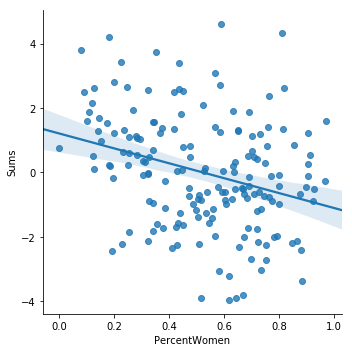

In [34]:
# linregress plot
sns.lmplot(data=combined, x='PercentWomen', y='Sums')
rval = linregress(combined['PercentWomen'], combined['Sums']).rvalue
print('R-Value = ' + str(rval))

There seems to be a negative correlation between percent women and how successful a major is. The less successful a major is, the more women there tends to be within the field. 

### 4.4 Discussion
Majors in fields like Engineering are mostly dominated by males, while majors in Arts and Humanities are dominated by females. The exploration difference in popular majors between gender was intended to determine what factors may lead to varying post-graduate success as defined by employment and salary rate.

# Ethics & Privacy

Some ethical considerations to keep in mind when looking at our project and its scope is that success is a very subjective concept. Success is ultimately defined by the beholder. Our project is strictly limited to looking at limited quantified components and qualitative factors that are just as, if not possibly more, important. There are attributes like employee satisfaction, turnover rates, and much more factors that are necessary to bring into discussion. 

Additionally, the optimization model is very basic and uses the already anonymized data. This may include many underlying biases. Today there is a great number of movements encouraging young girls to be interested in STEM and an integration of engineering and computer science courses in early childhood academic curriculum. 

# Conclusion & Discussion

The scope of our definition of major success was rather narrow. We did not take into account the length of employment, employee satisfaction, and individual career journeys due to the limited timeframe and resources we had. Moreover, it also doesn’t take into account what people can learn themselves in addition to their formal education and outside resources that can also contribute to their success during and after finishing their undergrad. In which case the limited range of our project observes the success of a few years after graduation, gender popularity of certain departments of majors and the outcome of choosing a major play a role in success and salary when starting a career. 

To summarize, what we did find in our project in conjunction to post graduation success, major choice and impact of gender was to quantitatively answer the following:
    - Is there a relationship between employment rate and median income?
    - Is there a relationship between major popularity and employment rate/median income?
    - Is there a significant trend in the proportion of women in each major?
    
Our first outcome to the first question takes a look into postgraduate success and major choice and our findings suggest that there is a slight positive correlation between employment rate and median income, showing some relationship between these two factors of "success". Major choice of course plays a role in having higher salaries (i.e. STEM majors usually pay more in comparison to non-STEM), but these factors dont have anything to do with major popularity. Secondly, that women do not significantly impact the popularity of certain majors and that having a higher percentage of women in a major doesn’t significantly mean that the salary for that major is higher. Conclusively, our project and its impact to society would be minimal in scale. Our work proves and aligns with some previous notions and generalizations of majors, specifically that STEM majors have better salaries and that it is mostly populated by males over females (currently) which holds true, especially in engineering fields.  But it does give insight to the relationship of women in majors and employment such that unemployment rate for women is influenced by greater factors than just the major graduated with, lower the number of women in a major, the greater the full-time employment rate is and that there is a need for more research to be done specifically looking into other factors that influence women and unemployment rates.

Overall, our data collection and analysis is an initial, naive step into looking at how college can attribute to success and how factors like one’s major during undergrad can influence early stages in a career. However, the reality of careers are that it takes time and years to establish and build and that people can change their mind easily and switch into an entire new career direction as they find new opportunities to experience new things.

# Future Work
For future work, we plan to expand the scope of our question and also include data from individuals in the workforce who are just beginning their career after undergrad and consider other outside factors and resources available that contribute to success. We would also like to research further into contributing success factors and expand our knowledge of what it means to be successful in today’s world in addition to job satisfaction and well earned wages. Nevertheless, we first would start with the idea of creating a guide to assist choosing a major based on post graduate success, major difficulty and current need or demand of jobs.